In [3]:
from google.colab import files

In [4]:
uploaded = files.upload()

Saving Bike_Sales.xlsx to Bike_Sales.xlsx


In [38]:
# 1. Data Loading and Initial Exploration (Bike_Sales.xlsx)

# Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib # joblib and pickle for model saving
import pickle
from sklearn.model_selection import train_test_split # sklearn for machine learning
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import re # and re for regular expressions

In [7]:
# Loading the dataset "Bike_Sales.xlsx" file into a pandas DataFrame
bike_sales = pd.read_excel("Bike_Sales.xlsx")

Data Exploration

In [8]:
# Getting an overview of the data
bike_sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2017-01-01,1,January,2017,17,Youth (<25),M,Canada,British Columbia,Bikes,Road Bikes,"Road-250 Red, 44",2,1519,2443,1848,3038,4886
1,2017-01-01,1,January,2017,23,Youth (<25),M,Australia,Victoria,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2,1252,2295,2086,2504,4590
2,2017-01-01,1,January,2017,33,Young Adults (25-34),F,France,Yveline,Bikes,Road Bikes,"Road-150 Red, 48",2,2171,3578,2814,4342,7156
3,2017-01-01,1,January,2017,39,Adults (35-64),M,United States,Washington,Bikes,Road Bikes,"Road-550-W Yellow, 38",2,713,1120,814,1426,2240
4,2017-01-01,1,January,2017,42,Adults (35-64),M,United States,California,Bikes,Road Bikes,"Road-750 Black, 44",2,344,540,392,688,1080


In [9]:
# Basic information about data/variable types
bike_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [10]:
# Descriptive statistics
print(bike_sales.describe())

                                Date            Day           Year  \
count                         113036  113036.000000  113036.000000   
mean   2020-01-06 01:36:09.376127744      15.665753    2019.520153   
min              2017-01-01 00:00:00       1.000000    2017.000000   
25%              2019-01-09 00:00:00       8.000000    2019.000000   
50%              2019-10-16 00:00:00      16.000000    2019.500000   
75%              2021-01-28 00:00:00      23.000000    2021.000000   
max              2021-12-31 00:00:00      31.000000    2021.000000   
std                              NaN       8.781567       1.179704   

        Customer_Age  Order_Quantity      Unit_Cost     Unit_Price  \
count  113036.000000   113036.000000  113036.000000  113036.000000   
mean       35.919212       11.901660     267.296366     452.938427   
min        17.000000        1.000000       1.000000       2.000000   
25%        28.000000        2.000000       2.000000       5.000000   
50%        35.00000

Data Cleaning and Pre-processing

In [11]:
# Check for missing values in data set
bike_sales.isnull().sum()

,0
Date,0
Day,0
Month,0
Year,0
Customer_Age,0
Age_Group,0
Customer_Gender,0
Country,0
State,0
Product_Category,0


In [14]:
# Converting currency columns i.e. Unit_Cost, Unit_Price, Cost, Profit, Revenue by removing '$' and ',' and converting them to float.

## Clean currency columns
def clean_currency(value):
    if isinstance(value, str):
        return float(value.replace('$', '').replace(',', ''))
    return float(value)

bike_sales['Unit_Cost'] = bike_sales['Unit_Cost'].apply(clean_currency)
bike_sales['Unit_Price'] = bike_sales['Unit_Price'].apply(clean_currency)
bike_sales['Profit'] = bike_sales['Profit'].apply(clean_currency)
bike_sales['Cost'] = bike_sales['Cost'].apply(clean_currency)
bike_sales['Revenue'] = bike_sales['Revenue'].apply(clean_currency)

In [15]:
bike_sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2017-01-01,1,January,2017,17,Youth (<25),M,Canada,British Columbia,Bikes,Road Bikes,"Road-250 Red, 44",2,1519.0,2443.0,1848.0,3038.0,4886.0
1,2017-01-01,1,January,2017,23,Youth (<25),M,Australia,Victoria,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2,1252.0,2295.0,2086.0,2504.0,4590.0
2,2017-01-01,1,January,2017,33,Young Adults (25-34),F,France,Yveline,Bikes,Road Bikes,"Road-150 Red, 48",2,2171.0,3578.0,2814.0,4342.0,7156.0
3,2017-01-01,1,January,2017,39,Adults (35-64),M,United States,Washington,Bikes,Road Bikes,"Road-550-W Yellow, 38",2,713.0,1120.0,814.0,1426.0,2240.0
4,2017-01-01,1,January,2017,42,Adults (35-64),M,United States,California,Bikes,Road Bikes,"Road-750 Black, 44",2,344.0,540.0,392.0,688.0,1080.0


In [ ]:
# Removing space from Variable names i.e. Unit_Cost, Unit_Price, Cost and Revenue
bike_sales.columns = bike_sales.columns.str.replace(" ", "")
bike_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              113036 non-null  object 
 1   Day               113036 non-null  int64  
 2   Month             113036 non-null  object 
 3   Year              113036 non-null  int64  
 4   Customer_Age      113036 non-null  int64  
 5   Age_Group         113036 non-null  object 
 6   Customer_Gender   113036 non-null  object 
 7   Country           113036 non-null  object 
 8   State             113036 non-null  object 
 9   Product_Category  113036 non-null  object 
 10  Sub_Category      113036 non-null  object 
 11  Product           113036 non-null  object 
 12  Order_Quantity    113036 non-null  int64  
 13  Unit_Cost         113036 non-null  float64
 14  Unit_Price        113036 non-null  float64
 15  Profit            113036 non-null  float64
 16  Cost              11

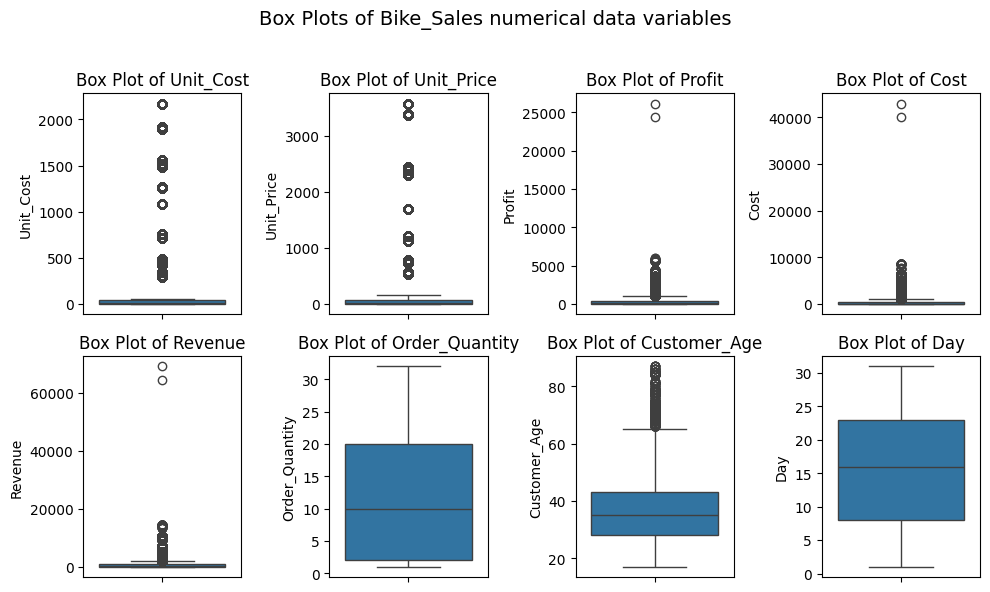

In [27]:
# Identifying outliers in the variables

# Numerical Data
n_data = bike_sales[["Unit_Cost", "Unit_Price", "Profit", "Cost", "Revenue", "Order_Quantity", "Customer_Age", "Day"]]

# Create a figure with separate subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 6))  # 2x4 grid
fig.suptitle("Box Plots of Bike_Sales numerical data variables", fontsize=14)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each variable separately
for i, column in enumerate(n_data.columns):
    sns.boxplot(y=n_data[column], ax=axes[i])
    axes[i].set_title(f"Box Plot of {column}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



**Observation:**
All numerical variable values have outliers apart from Order_Quantity and Day


In [42]:
# Handling outliers in the using the z-scores
from scipy import stats

# Computing z-scores
z_scores = np.abs(stats.zscore(n_data))

median_value = np.median(n_data)
n_data = np.where(z_scores > 3, median_value, n_data)
n_data

array([[2.800e+01, 2.443e+03, 2.800e+01, ..., 2.000e+00, 1.700e+01,
        1.000e+00],
       [1.252e+03, 2.295e+03, 2.800e+01, ..., 2.000e+00, 2.300e+01,
        1.000e+00],
       [9.000e+00, 2.400e+01, 1.350e+02, ..., 2.000e+00, 3.300e+01,
        1.000e+00],
       ...,
       [7.130e+02, 1.120e+03, 4.070e+02, ..., 1.000e+00, 2.600e+01,
        3.100e+01],
       [1.252e+03, 2.295e+03, 1.043e+03, ..., 1.000e+00, 3.300e+01,
        3.100e+01],
       [7.130e+02, 1.120e+03, 4.070e+02, ..., 1.000e+00, 4.400e+01,
        3.100e+01]])

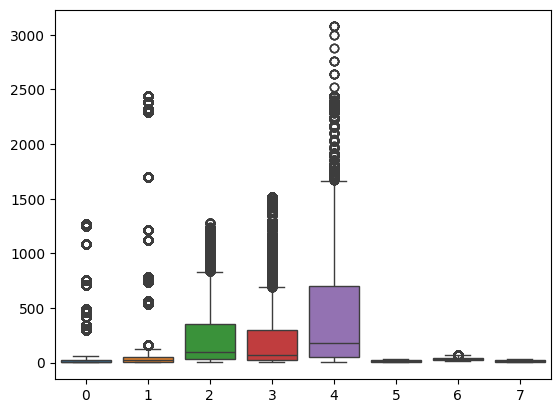

In [46]:
# Creating other boxplots to check for changes
sns.boxplot(data=n_data)

# Set x-axis labels
#plt.xticks(range(1, len(n_data) + 1), n_data) #for naming the columns

# Show the plot
plt.show()

In [48]:
# Saving the cleaned dataset as xlsx
bike_sales.to_csv("Nantaba.xlsx", index=False)

**2. PART A: Generate a machine learning model to classify the variable "Age_Group" in the above
transformed dataset. Save the above generated model as a job lib or pickle called
"age_predictor.joblib" or "age_predictor.pkl"**

In [50]:
#Creating a copy of the dataframe for transforming variables through label encording
bike_sales_copy = bike_sales.copy()


In [51]:
# Converting categorical variables to numerical using Label Encoder for machine learning
label_encoder = LabelEncoder()
categorical_cols = ['Month', 'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product']
for col in categorical_cols:
    bike_sales_copy[col] = label_encoder.fit_transform(bike_sales_copy[col])

bike_sales_copy.head()  # Checking for the changes made by label encoder


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2017-01-01,1,4,2017,17,3,1,1,5,1,11,66,2,1519.0,2443.0,1848.0,3038.0,4886.0
1,2017-01-01,1,4,2017,23,3,1,0,48,1,10,34,2,1252.0,2295.0,2086.0,2504.0,4590.0
2,2017-01-01,1,4,2017,33,2,0,2,52,1,11,58,2,2171.0,3578.0,2814.0,4342.0,7156.0
3,2017-01-01,1,4,2017,39,0,1,5,50,1,11,74,2,713.0,1120.0,814.0,1426.0,2240.0
4,2017-01-01,1,4,2017,42,0,1,5,6,1,11,91,2,344.0,540.0,392.0,688.0,1080.0


In [52]:
# Dropping the column date since its details are repeated and may not have an influence on determining the correlation matrix

col_dropped = bike_sales_copy.drop(columns=['Date'])
col_dropped.head(2)

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,1,4,2017,17,3,1,1,5,1,11,66,2,1519.0,2443.0,1848.0,3038.0,4886.0
1,1,4,2017,23,3,1,0,48,1,10,34,2,1252.0,2295.0,2086.0,2504.0,4590.0


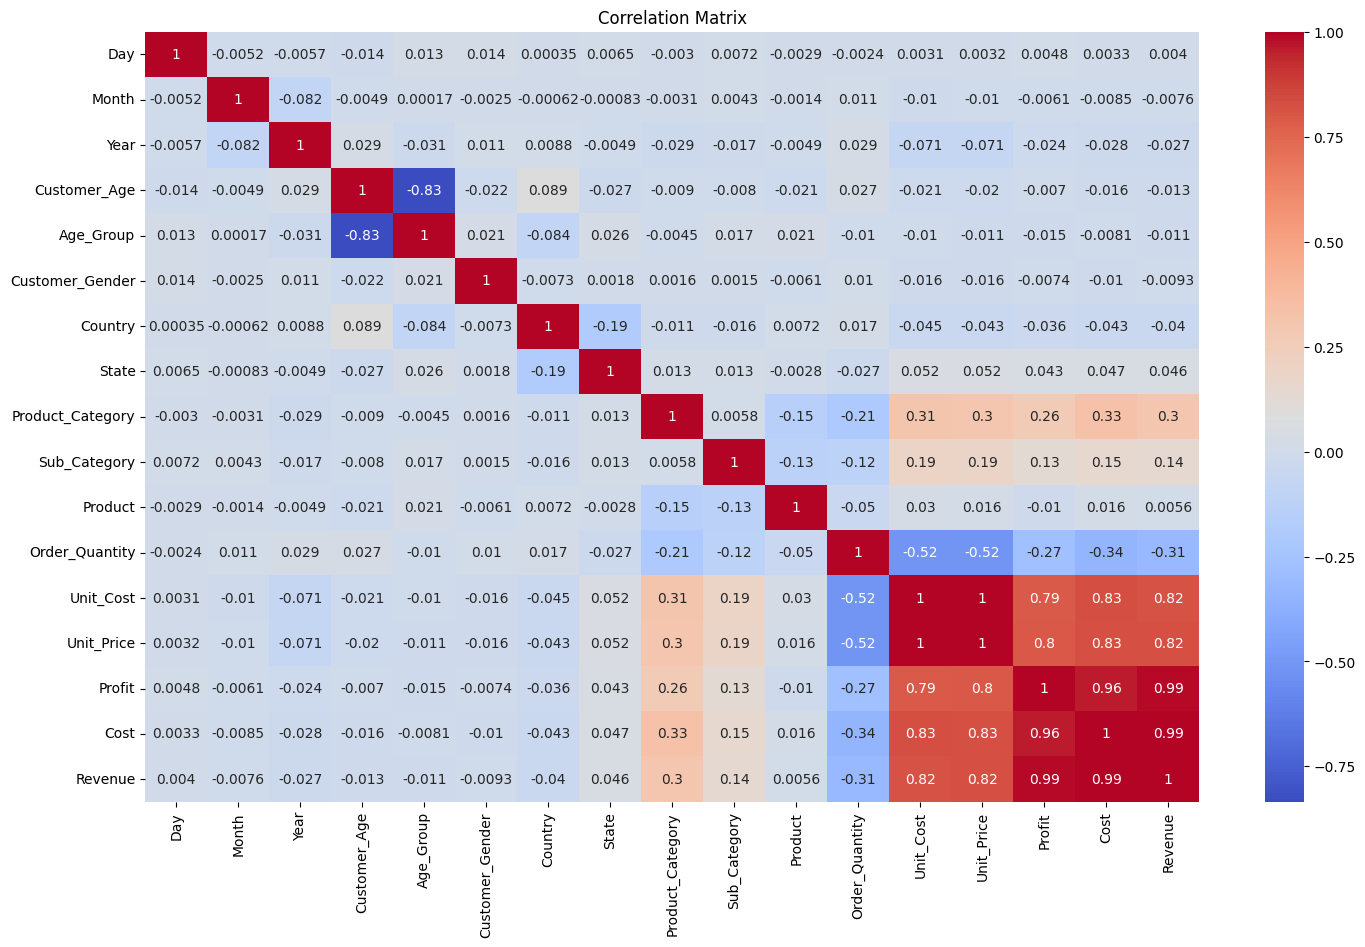

In [53]:
# Visualizing the correlation matrix using a heatmap to provide insights into the relationships between variables
plt.figure(figsize=(17, 10))
sns.heatmap(col_dropped.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Interpretation:** There is:

1.   A Strong negative relationship between Customer_age and Age_group, Order_Quantity and Unit_Cost, Order_Quantity and Unit_Price.
2.   A Strong positive relationship between Profit and revenue, Cost and Revenue, Cost and Profit,Revenue and Unit Cost, Revenue and Unit Price, Cost and Unit_Cost, and Ptrofit and Unit_Cost, and Revenue, Customer_Age and Profit, Age_Group and Cost.
3. A Weak negative relationship between Month and state, Country and Month, Month and Revenue.
4. And A weak positive correlation between Age_Group and Month, Day and Country.

In [54]:
# Preparing features and target variable by separating the features (X) and the target variable (y), 'Age_Group'
X = col_dropped.drop('Age_Group', axis=1)
y = col_dropped['Age_Group']

In [55]:
# Spliting the data into training and testing sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Training a Random Forest Classifier, a powerful ensemble method for classification
model_age = RandomForestClassifier(random_state=42) # setting the model results at 42
model_age.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [57]:
# Making predictions
y_pred = model_age.predict(X_test)

In [58]:
# Evaluating the model's accuracy using accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [62]:
#  Model Saving (Age_Group Classification)

# Saving the model as joblib
joblib.dump(model_age, "age_predictor.joblib")

print("Age_Group Classification model saved successfully as 'age_predictor.joblib'")

Age_Group Classification model saved successfully as 'age_predictor.joblib'


In [63]:
# Saving the model as pickle
with open("age_predictor.pkl", "wb") as f:  # Open the file in binary write mode
    pickle.dump(model_age, f)

print("Age_Group Classification model saved successfully as 'age_predictor.pkl'")

Age_Group Classification model saved successfully as 'age_predictor.pkl'


**3. Using the transformed dataset from question 1 as your training dataset, and the
"Bike_sales_Uganda.xlsx" as your testing data;**

a) **Generate a machine learning model to predict the "Revenue". Save the above model as a joblib or pickle called "Revenue_predictor"**

In [64]:
uploaded = files.upload()

Saving Bike_sales_Uganda.xlsx to Bike_sales_Uganda.xlsx


In [66]:
# Load the Bike_sales_Uganda dataset
bike_sales_uganda = pd.read_excel("Bike_sales_Uganda.xlsx")

In [80]:
bike_sales_uganda.isnull().sum()

,0
Day,0
Month,0
Year,0
Customer_Age,0
Age_Group,0
Customer_Gender,0
Country,0
State,0
Product_Category,0
Sub_Category,0


In [67]:
# Remove the 'Date' column from bike_sales_uganda
bike_sales_uganda = bike_sales_uganda.drop(columns=['Date'], errors='ignore')

In [68]:
# Preprocess the "Bike_sales_Uganda" dataset, cleaning currency columns
bike_sales_uganda['Unit_Cost'] = bike_sales_uganda['Unit_Cost'].apply(clean_currency)
bike_sales_uganda['Unit_Price'] = bike_sales_uganda['Unit_Price'].apply(clean_currency)
bike_sales_uganda['Profit'] = bike_sales_uganda['Profit'].apply(clean_currency)
bike_sales_uganda['Cost'] = bike_sales_uganda['Cost'].apply(clean_currency)
bike_sales_uganda['Revenue'] = bike_sales_uganda['Revenue'].apply(clean_currency)

print(bike_sales_uganda.head(3))

   Day   Month  Year  Customer_Age             Age_Group Customer_Gender  \
0    1    June  2020            33  Young Adults (25-34)               F   
1    1    July  2020            41        Adults (35-64)               M   
2    1  August  2020            33  Young Adults (25-34)               F   

  Country     State Product_Category       Sub_Category              Product  \
0  Uganda   Western      Accessories    Tires and Tubes  Patch Kit/8 Patches   
1  Uganda   Eastern      Accessories  Bottles and Cages     Road Bottle Cage   
2  Uganda  Northern      Accessories    Tires and Tubes  Patch Kit/8 Patches   

   Order_Quantity  Unit_Cost  Unit_Price  Profit  Cost  Revenue  
0             100        1.0         2.0    30.0  30.0      NaN  
1              28        3.0         9.0   168.0  84.0      NaN  
2              24        1.0         2.0    24.0  24.0      NaN  


In [69]:
# Encoding categorical variables using Label encoder (Uganda dataset)
for col in categorical_cols:
    if col in bike_sales_uganda.columns:
        bike_sales_uganda[col] = label_encoder.fit_transform(bike_sales_uganda[col])

print(bike_sales_uganda.head())

   Day  Month  Year  Customer_Age  Age_Group  Customer_Gender  Country  State  \
0    1      6  2020            33          1                0        0      7   
1    1      5  2020            41          0                1        0      1   
2    1      1  2020            33          1                0        0      4   
3    1     11  2020            37          0                1        0      5   
4    1     10  2020            30          1                0        0      6   

   Product_Category  Sub_Category  Product  Order_Quantity  Unit_Cost  \
0                 0             4        5             100        1.0   
1                 0             0        6              28        3.0   
2                 0             4        5              24        1.0   
3                 0             4        1              24        6.0   
4                 0             4        7              22        1.0   

   Unit_Price  Profit   Cost  Revenue  
0         2.0    30.0   30.0      

In [70]:
# Preparing training and testing data for revenue prediction
X_train_revenue = col_dropped.drop('Revenue', axis=1)
y_train_revenue = col_dropped['Revenue']
X_test_revenue = bike_sales_uganda.drop('Revenue', axis=1)
y_test_revenue = bike_sales_uganda['Revenue']

In [79]:
# Detecting NaN rows from X_test_revenue and y_test_revenue
nan_rows = y_test_revenue.isna()
nan_rows

,Revenue
0,True
1,True
2,True
3,True
4,True
5,True
6,True
7,True
8,True
9,True


In [73]:
# Checking if y_test_revenue is entirely NaN
if nan_rows.all():
    print("Error: All revenue values in the Uganda dataset are NaN.")
    # Handle the error (e.g., skip prediction, return a default value)
else:
    # Filtering out NaN rows
    X_test_revenue = X_test_revenue[~nan_rows]
    y_test_revenue = y_test_revenue[~nan_rows]

Error: All revenue values in the Uganda dataset are NaN.


In [74]:
# Checking if X_test_revenue is now empty
if X_test_revenue.empty:
    print("Error: After removing NaN rows, the test dataset is empty.")
    # Handle the error (e.g., skip prediction)
else:
    # Train a Random Forest Regressor, suitable for predicting continuous values like revenue
    model_revenue = RandomForestRegressor(random_state=42)
    model_revenue.fit(X_train_revenue, y_train_revenue)


In [75]:
 # Making predictions
y_pred_revenue = model_revenue.predict(X_test_revenue)


In [82]:
# Evaluating the model using Mean Squared Error (MSE).
#mse = mean_squared_error(y_test_revenue, y_pred_revenue)
#print(f"Mean Squared Error: {mse}")

In [83]:
# Saving the trained model as joblib
joblib.dump(model_revenue, "Revenue_predictor.joblib")

['Revenue_predictor.joblib']

In [84]:
#Also saving as a pickle
with open("Revenue_predictor.pkl", "wb") as file:
    pickle.dump(model_revenue, file)

**b) Use the "Revenue_predictor" model to predict the "Revenue" in the testing dataset
"Bike_sales_Uganda.xlsx". Save your output prediction as a csv file labelled
"Revenue_prediction.csv"**

In [ ]:
# Saving predictions to a CSV file
revenue_predictions = pd.DataFrame({'Predicted_Revenue': y_pred_revenue})
revenue_predictions.to_csv("Revenue_prediction.csv", index=False)

**PART B: Abalone Traits**
Use the datasets to answer the following questions;

**1. Generate a machine learning model suitable for predicting the age of Abalone.**

In [85]:
# Data Loading and Initial Exploration
uploaded = files.upload()

Saving Test.csv to Test.csv
Saving Train.csv to Train.csv


In [86]:
# Loading the datasets into pandas DataFrames
train_data = pd.read_csv("Train.csv")
test_data = pd.read_csv("Test.csv")

In [87]:
# Displaying the first few rows and basic information to get an initial understanding of the data
print("Train Data:")
train_data.head()


Train Data:


,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [88]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [89]:
#Descriptive statistics for the train data
train_data.describe()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,45307.000000,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,26158.441658,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,22653.500000,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,45307.000000,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,67960.500000,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,90614.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [90]:
print("\nMissing values in Train Data:")
train_data.isna().sum()


Missing values in Train Data:


,0
id,0
Sex,0
Length,0
Diameter,0
Height,0
Whole weight,0
Whole weight.1,0
Whole weight.2,0
Shell weight,0
Rings,0


In [91]:
print("\nTest Data:")
test_data.head()


Test Data:


,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [93]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              60411 non-null  int64  
 1   Sex             60411 non-null  object 
 2   Length          60411 non-null  float64
 3   Diameter        60411 non-null  float64
 4   Height          60411 non-null  float64
 5   Whole weight    60411 non-null  float64
 6   Whole weight.1  60411 non-null  float64
 7   Whole weight.2  60411 non-null  float64
 8   Shell weight    60411 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.1+ MB


In [94]:
test_data.describe()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
count,60411.000000,60411.000000,60411.000000,60411.000000,60411.000000,60411.000000,60411.000000,60411.000000
mean,120820.000000,0.517428,0.401961,0.135751,0.790062,0.341227,0.169419,0.226125
std,17439.297893,0.117609,0.097470,0.038175,0.457591,0.204221,0.100720,0.129826
min,90615.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,105717.500000,0.450000,0.345000,0.110000,0.419500,0.178500,0.086500,0.120000
50%,120820.000000,0.545000,0.425000,0.140000,0.801500,0.329000,0.166000,0.225000
75%,135922.500000,0.600000,0.470000,0.160000,1.070000,0.464500,0.232500,0.305000
max,151025.000000,0.800000,0.650000,1.095000,2.825500,1.488000,0.641500,1.004000


In [95]:
# Check for missing values in test data
print("\nMissing values in Test Data:")
test_data.isnull().sum()


Missing values in Test Data:


,0
id,0
Sex,0
Length,0
Diameter,0
Height,0
Whole weight,0
Whole weight.1,0
Whole weight.2,0
Shell weight,0


In [96]:
# Handling categorical variable 'Sex'

# Let's use LabelEncoder to convert the categorical 'Sex' variable into numerical values in both datasets.
# And Use fit_transform on the training data and transform on the test data to ensure consistency.

label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
test_data['Sex'] = label_encoder.transform(test_data['Sex'])

train_data.head(4)



,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.240,11
1,1,0,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.320,11
2,2,1,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.005,6
3,3,2,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.250,10


In [97]:
#Checking for changes
test_data.head(3)

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,2,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,2,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,2,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405


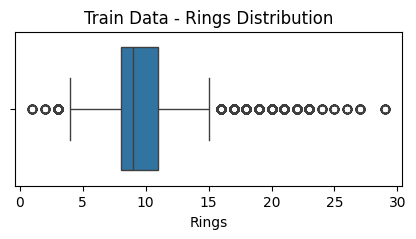

In [98]:
#Checking for outliers in 'Rings'
plt.figure(figsize=(5, 2))
sns.boxplot(x=train_data['Rings'])
plt.title('Train Data - Rings Distribution')
plt.show()

**Observation:** There are observed outliers in the Rings column

In [99]:
# Handling Outliers (Example: using IQR method for 'Rings' in Train data)
Q1 = train_data['Rings'].quantile(0.25)
Q3 = train_data['Rings'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
train_data = train_data[(train_data['Rings'] >= lower_bound) & (train_data['Rings'] <= upper_bound)]

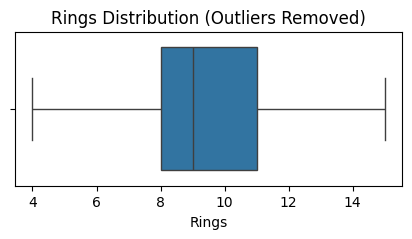

In [100]:
# Visualizing Rings distribution after outlier removal using a Boxplot.
plt.figure(figsize=(5, 2))
sns.boxplot(x=train_data['Rings'])
plt.title('Rings Distribution (Outliers Removed)')
plt.show()

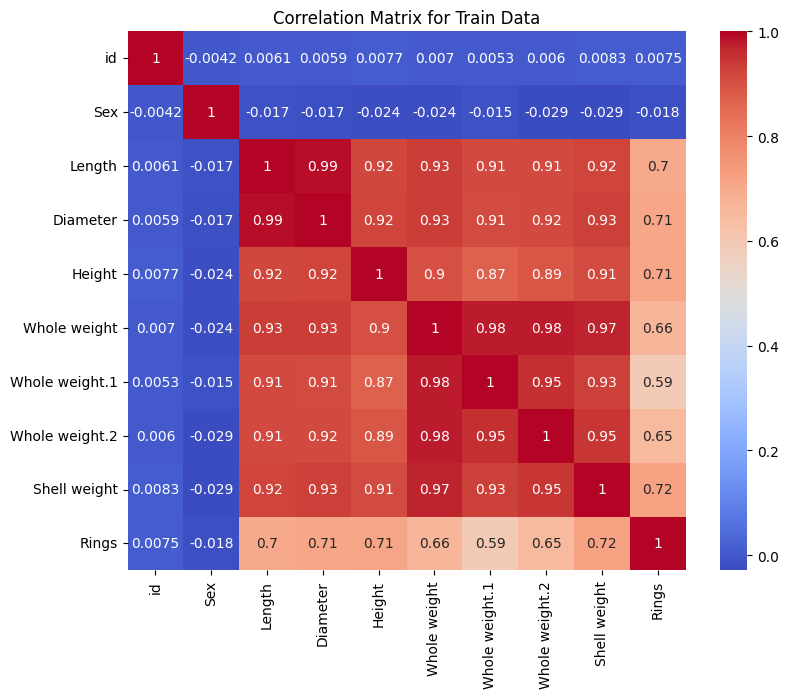

In [101]:
# Visualizing correlation matrix for train data using a heatmap
plt.figure(figsize=(9, 7))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Train Data')
plt.show()

**Observation:**
1. There is a strong positive correlation between length and diameter, Whole weight and Whole weight 1, Whole weight and Whole weight 2, Whole weight and Shell weight, Whole weight 2 and Whole weight 1

2. A strong negative correlation between Shell weight and Whole weight, Sex and Whole weight 2



In [102]:
# Machine Learning Model Training (Train Data)

# Prepare features (X_train) and target variable (y_train)
X_train = train_data.drop(['id', 'Rings'], axis=1)
y_train = train_data['Rings']

In [103]:
# Training a Random Forest Regressor
model_train = RandomForestRegressor(random_state=42)
model_train.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [104]:
# Making predictions on the training data and evaluating the model using MSE
y_train_pred = model_train.predict(X_train)

In [105]:
# Evaluating the model on the training data
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Training Mean Squared Error: {mse_train}")

Training Mean Squared Error: 0.2571095818117564


**Interpretation:**

Considering that our target variable has a relative range of 1-29 units, a relative error of 0.2571095818117564 symbolizes that our model is good.
Thus giving a good prediction of Abalone's age

In [107]:
#Model Saving (Train Data)

# Saving the trained model as joblib
joblib.dump(model_train, "train_abalone_age.joblib")

['train_abalone_age.joblib']

**2. To predict the age of the Abalone species in the testing dataset (i.e. Test.csv)**

In [108]:
# Saving the model as pickle
with open("train_abalone_age.pkl", "wb") as f:  # Open the file in binary write mode
    pickle.dump(model_train, f)

In [110]:
#Prediction on Test Data

# Prepare the features (X_test) for the test data
X_test = test_data.drop('id', axis=1)

In [111]:
# Let's use the trained model to make predictions on the test data
y_test_pred = model_train.predict(X_test)

In [112]:
test_predictions = pd.DataFrame({'id': test_data['id'], 'Predicted_Rings': y_test_pred})

In [115]:
# Converting the 'predictions' column to integers
test_predictions['Predicted_Rings'].astype(int)

,Predicted_Rings
0,10
1,9
2,9
3,10
4,7
...,...
60406,6
60407,9
60408,11
60409,12


In [117]:
# Saving the predictions to a CSV file named "test_predictions.csv"
test_predictions.to_csv("Test_predictions.csv", index=False)

*The PatientReviews.csv dataset contains the patients’ medical visits with timelogs at a public
healthcare centre.*
Use the dataset to answer the following questions;

**3. Generate the event logs for the above dataset and save them as Question 2. [10 MARKS]**

In [118]:
uploaded = files.upload()

Saving PatientReviews.csv to PatientReviews.csv


In [119]:
# Load the dataset
patient_reviews = pd.read_csv("PatientReviews.csv")

In [120]:
# Display the first few rows
patient_reviews.head()

,patient,action,org:resource,DateTime
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11
1,patient 0,Blood test,Lab,2017-01-02 12:47:33
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09


In [121]:
patient_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   patient        690 non-null    object
 1    action        690 non-null    object
 2    org:resource  690 non-null    object
 3    DateTime      690 non-null    object
dtypes: object(4)
memory usage: 21.7+ KB


In [122]:
patient_reviews.isnull().sum()

,0
patient,0
action,0
org:resource,0
DateTime,0


In [123]:
# Obtaining descriptive statistics
patient_reviews.describe()

,patient,action,org:resource,DateTime
count,690,690,690,690
unique,100,8,13,690
top,patient 50,First consult,Dr. Anna,2017-01-02 11:40:11
freq,7,100,158,1


In [124]:
import logging

In [125]:
!pip3 install pm4py

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.4 MB/s eta 0:00:00
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26097 sha256=4a4197243c9afbdfad7ba3a4ddda3aa63e6f6521abe56f894c9219567430656a
  Stored in directory: /root/.cache/pip/wheels/31/d7/d9/eec6891f78cac19a693bd40ecb8365d2f4613318c145ec9816
Successfully built intervaltree


In [126]:
!pip show pm4py

Name: pm4py
Version: 2.7.13.1
Summary: Process mining for Python
Home-page: https://processintelligence.solutions/
Author: Process Intelligence Solutions (PIS)
Author-email: info@processintelligence.solutions
License: AGPL 3.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: cvxopt, deprecation, graphviz, intervaltree, lxml, matplotlib, networkx, numpy, pandas, pydotplus, pytz, scipy, setuptools, tqdm, wheel
Required-by: 


In [128]:
# Import Npm4py as a process mining library used to analyze event logs and extract process models
import pm4py
print(pm4py.__version__)

2.7.13.1


In [133]:
# Checking the variable datatypes
patient_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   patient            690 non-null    object             
 1    action            690 non-null    object             
 2    org:resource      690 non-null    object             
 3    DateTime          690 non-null    datetime64[ns, UTC]
 4   case:concept:name  690 non-null    object             
 5   concept:name       690 non-null    object             
 6   time:timestamp     690 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), object(5)
memory usage: 37.9+ KB


In [136]:
# Convert the ' DateTime' column to datetime
patient_reviews[' DateTime'] = pd.to_datetime(patient_reviews[' DateTime'])

# Converting the DataFrame to an event log format
event_log = pm4py.format_dataframe(patient_reviews, case_id='patient', activity_key=' action', timestamp_key=' DateTime')

# Saving the event log in XES format, a standard format for process mining
pm4py.write_xes(event_log, "patient_reviews.xes")

TypeError: <class 'pandas._libs.tslibs.timestamps.Timestamp'> is not convertible to datetime, at position 0

In [130]:
# Converting the DataFrame to an event log format
# # Specifying the columns representing the case ID ('patient'), activity ('action'), and timestamp ('DateTime')
event_log = pm4py.format_dataframe(patient_reviews, case_id='patient', activity_key=' action', timestamp_key=' DateTime')

# Saving the event log in XES format, a standard format for process mining
pm4py.write_xes(event_log, 'Question 2.xes')

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
# Configuring event logs
logging.basicConfig(
    filename="event_logs.log",  # Log file name
    level=logging.INFO,         # Log level (INFO, DEBUG, WARNING, ERROR, CRITICAL)
    format="%(asctime)s - %(levelname)s - %(message)s",  # Log format
)

# Generate logs
logging.info("This is an info message.")
logging.warning("This is a warning!")
logging.error("Something went wrong.")

In [ ]:
# Configure logging to save to a file
logging.basicConfig(
    filename="app_logs.log",  # Log file name
    level=logging.INFO,        # Log level
    format="%(asctime)s - %(levelname)s - %(message)s",  # Log format
)

# Logging messages
logging.info("Application started.")
logging.warning("This is a warning!")
logging.error("An error occurred.")

print("Logs saved to app_logs.log")

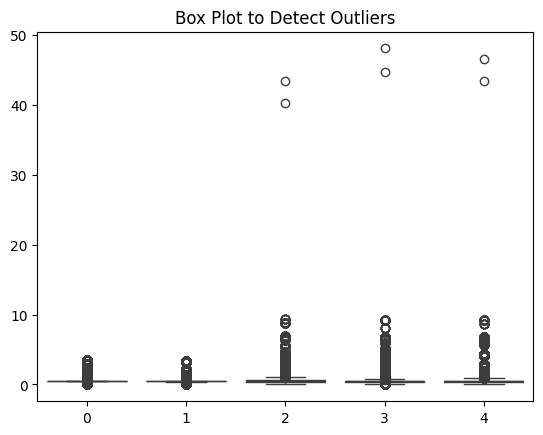

In [ ]:
# Box plot visualization
sns.boxplot(data=z_scores)
plt.title("Box Plot to Detect Outliers")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

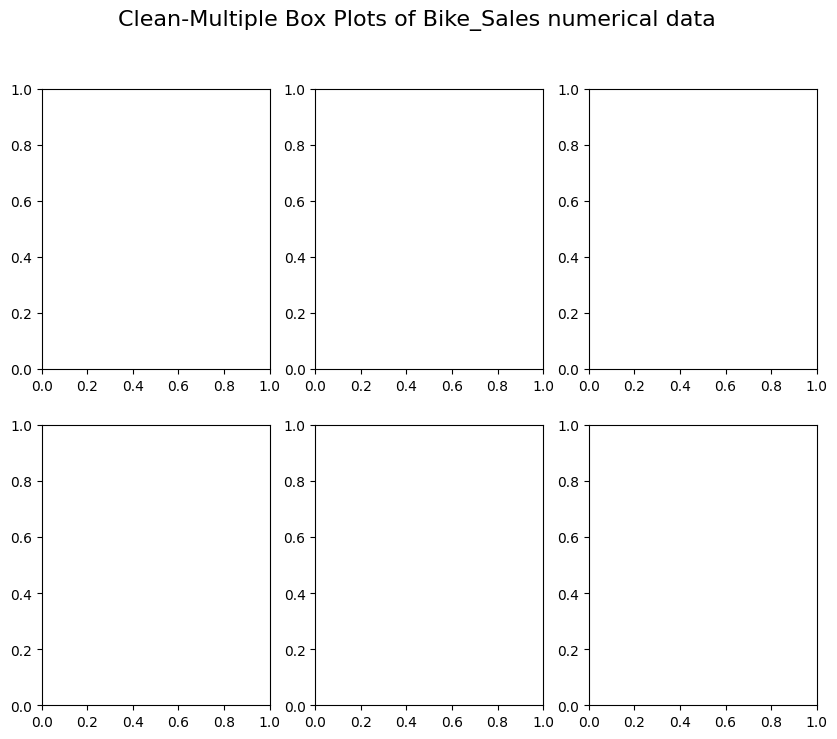

In [ ]:
#Checking for changes
# Create a figure with separate subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))  # 2x3 grid
fig.suptitle("Clean-Multiple Box Plots of Bike_Sales numerical data", fontsize=16)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each variable separately
for i, column in enumerate(n_data.columns):
    sns.boxplot(y=n_data[column], ax=axes[i])
    axes[i].set_title(f"Box Plot of {column}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
# Creating Multiple Box Plots
plt.figure(figsize=(10, 6))
sns.boxplot(n_data)

# Customizing the plot
plt.title("Multiple Box Plots of Bike_Sales")
plt.xlabel("Bike Sale Numerical Variables")
plt.ylabel("Values")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

In [ ]:
# Handling outliers in the 'Revenue' column using the Interquartile Range (IQR) method.
Q1 = bike_sales['Revenue'].quantile(0.25)
Q3 = bike_sales['Revenue'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
bike_sales = bike_sales[(bike_sales['Revenue'] >= lower_bound) & (bike_sales['Revenue'] <= upper_bound)]

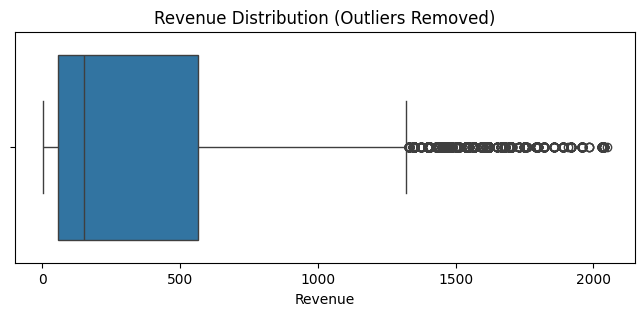

In [ ]:
# Visualizing Revenue Distribution after outlier handling using a box plot
plt.figure(figsize=(8, 3))
sns.boxplot(x=bike_sales['Revenue'])
plt.title('Revenue Distribution (Outliers Removed)')
plt.show()